AB: 0.671971 (0.039488)
optimized_parameters {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}

SGD: 0.522882 (0.055272)
optimized_parameters {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

NNMLP: 0.761847 (0.013846)
optimized_parameters {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, '

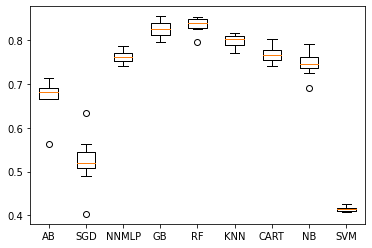


Prediction step

name =  AB
0.6290322580645161
[[  0   0   0  67   0   0]
 [  0 255  62  65   1   0]
 [  0  32  70   3   5   0]
 [  0  31   0 238   0   0]
 [  0   0   2   0  22   0]
 [  0   2  34   1  40   0]]
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        67
    Moderate       0.80      0.67      0.73       383
        Poor       0.42      0.64      0.50       110
Satisfactory       0.64      0.88      0.74       269
      Severe       0.32      0.92      0.48        24
   Very Poor       0.00      0.00      0.00        77

    accuracy                           0.63       930
   macro avg       0.36      0.52      0.41       930
weighted avg       0.57      0.63      0.58       930


name =  SGD
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to 

In [1]:
# Source code: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# Additional list of ML methods:
## https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/
## https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


# Compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load dataset
file = "https://raw.githubusercontent.com/ivanksinggih/air_quality_prediction/data/Data(2_noEmpty).csv"
names = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'Air_quality']

dataset = read_csv(file, names=names)

# Split-out validation dataset
array = dataset.values
X = array[:,0:12]
y = array[:,12]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('NNMLP', MLPClassifier(alpha=1, max_iter=1000)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:  
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  optimized_parameters = model.get_params(deep=True)
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
  print('optimized_parameters',optimized_parameters)
  print()
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.show()


print()
print('Prediction step')
# Make predictions on validation dataset
for name, model in models:
	print()
	print('name = ',name)
	model.fit(X_train, Y_train)
	# optimized_parameters = model.get_params(deep=True)
	predictions = model.predict(X_validation)
	# Evaluate predictions
	print(accuracy_score(Y_validation, predictions))
	print(confusion_matrix(Y_validation, predictions))
	print(classification_report(Y_validation, predictions))
	# print('optimized_parameters',optimized_parameters)